<a href="https://colab.research.google.com/github/Vanisha2005/OTT_Viewer_Analysis/blob/main/OTT_Viewer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hulu_titles.csv.csv to hulu_titles.csv.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
netflix = pd.read_csv('netflix_titles.csv')
prime = pd.read_csv('amazon_prime_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')
hulu = pd.read_csv('hulu_titles.csv')


In [24]:
netflix['platform'] = 'Netflix'
prime['platform'] = 'Amazon Prime'
disney['platform'] = 'Disney+'
hulu['platform'] = 'Hulu'

In [8]:
combined_df = pd.concat([netflix, prime, disney, hulu], ignore_index=True)

In [9]:
combined_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [10]:
combined_df.to_csv("all_platforms_combined.csv", index=False)

In [12]:
files.download('all_platforms_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
print(combined_df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'platform', 'duration_minutes']


In [25]:
# Drop duplicates or check for nulls
combined_df.drop_duplicates(inplace=True)
combined_df.dropna(subset=['type', 'duration', 'rating', 'release_year'], inplace=True)

# Convert 'duration' to numeric (for movies)
combined_df['duration_minutes'] = combined_df['duration'].str.extract('(\d+)').astype(float)


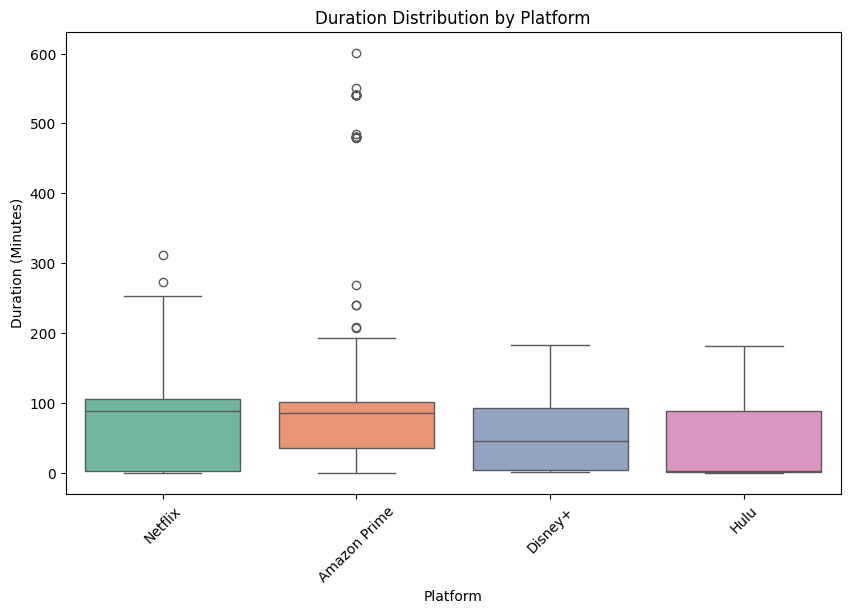

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df, x='platform', y='duration_minutes', hue='platform', palette='Set2', legend=False)
plt.title('Duration Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

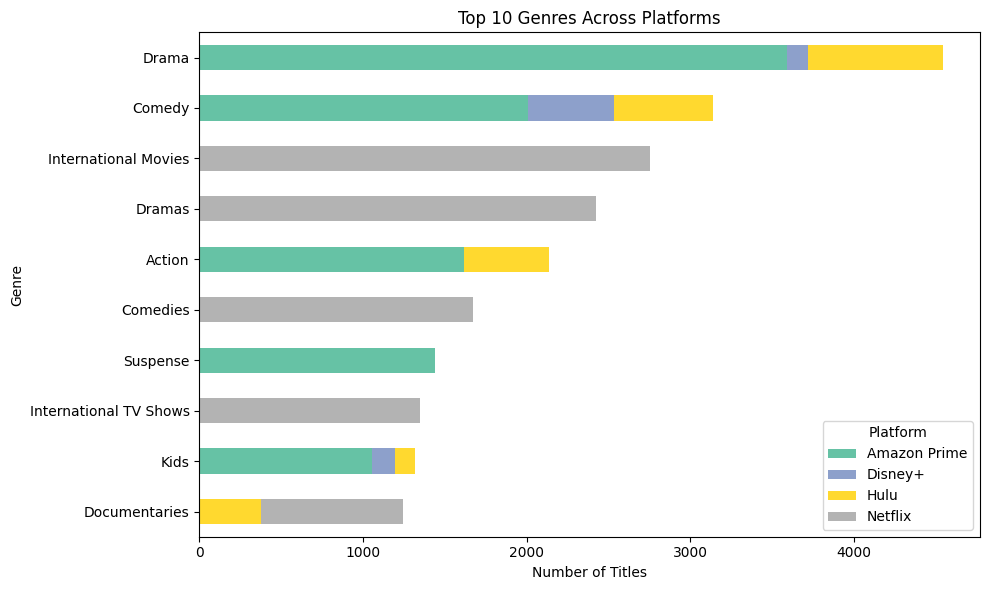

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Step 1: Create a DataFrame with all exploded genres and platforms
genre_platform_df = combined_df[['platform', 'listed_in']].dropna().copy()
genre_platform_df['listed_in'] = genre_platform_df['listed_in'].str.split(',')

# Explode so each row has one genre
genre_platform_df = genre_platform_df.explode('listed_in')
genre_platform_df['listed_in'] = genre_platform_df['listed_in'].str.strip()

# Step 2: Count genre occurrences per platform
genre_counts = genre_platform_df.groupby(['listed_in', 'platform']).size().unstack(fill_value=0)

# Step 3: Get top 10 genres overall
top_genres = genre_platform_df['listed_in'].value_counts().nlargest(10).index

# Filter for top genres only
top_genre_counts = genre_counts.loc[top_genres]

# Step 4: Plot stacked horizontal bar chart
top_genre_counts.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Top 10 Genres Across Platforms')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Platform')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



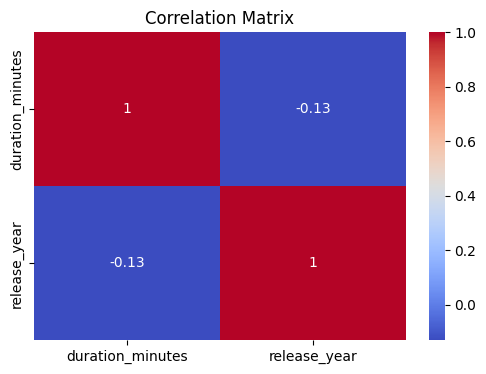

In [29]:
# Compute correlation only for numeric columns
correlation_df = combined_df[['duration_minutes', 'release_year']].dropna()
corr_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


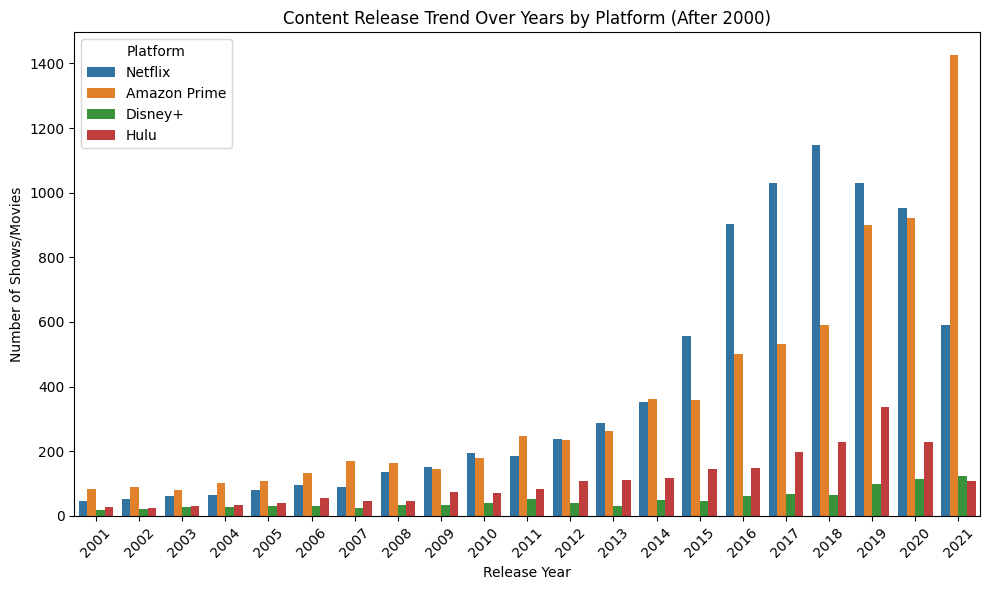

In [34]:
# Filter data for release year > 2000
filtered_df = combined_df[combined_df['release_year'] > 2000]

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x='release_year', hue='platform')
plt.title('Content Release Trend Over Years by Platform (After 2000)')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


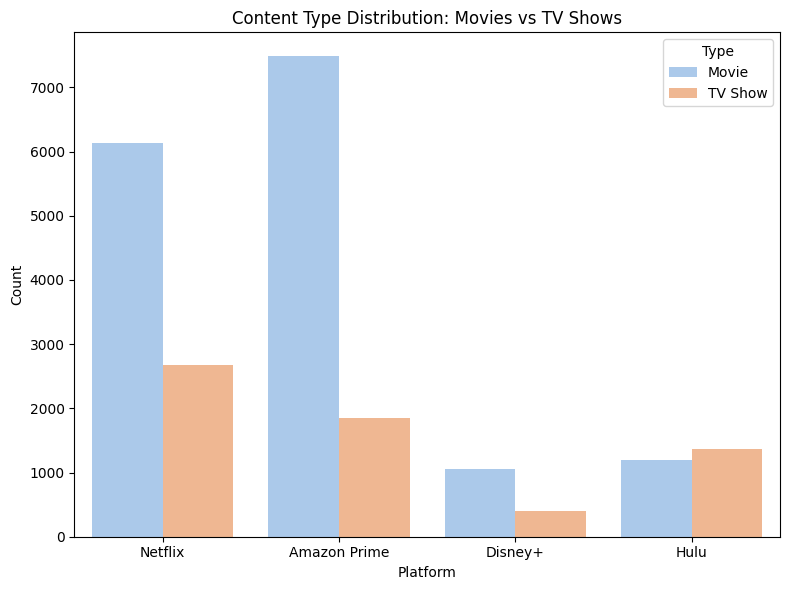

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=combined_df, x='platform', hue='type', palette='pastel')
plt.title('Content Type Distribution: Movies vs TV Shows')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


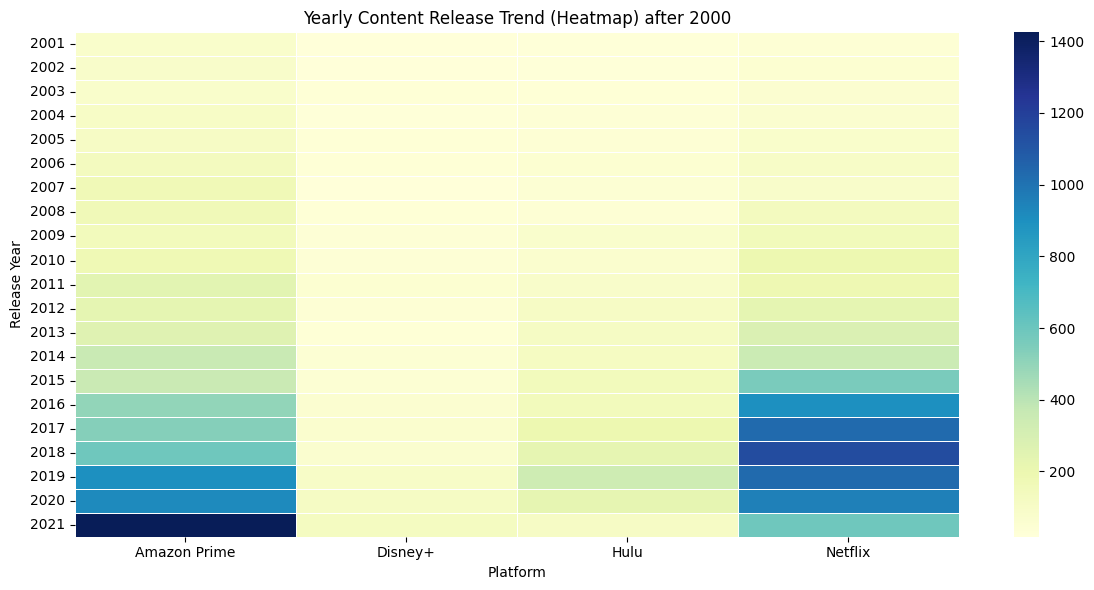

In [36]:
filtered_df = combined_df[combined_df['release_year'] > 2000]

# Create a pivot table: platform vs year
heatmap_data = filtered_df.groupby(['release_year', 'platform']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Yearly Content Release Trend (Heatmap) after 2000')
plt.xlabel('Platform')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()


This project presents a comprehensive visual analysis of content across major OTT platforms—Netflix, Amazon Prime Video, Disney+, and Hulu—using real-world datasets. We explored key dimensions such as content duration, platform-wise content distribution,TV ratings, yearly release trends, and popular genres.

Through a blend of box plots, bar graphs, and heatmaps, the analysis highlights platform-specific strengths—like Disney+ in family-friendly content, Netflix’s diversity in genres, and Prime Video’s consistent releases post-2000.

From understanding audience preferences to platform content strategies, this project delivers critical insights for content creators, platform strategists, and data enthusiasts. The genre breakdown further reveals how each platform carves its niche in the competitive streaming space.